# American Census

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Global config

In [2]:
# Data config
path_to_csv = "adult.csv"

## Load data

In [3]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")
X_train['native-country'].value_counts()

 United-States                 14598
 Mexico                          311
 Philippines                      85
 Canada                           67
 Germany                          66
 Puerto-Rico                      63
 El-Salvador                      58
 India                            57
 Cuba                             44
 England                          43
 Jamaica                          43
 South                            41
 China                            38
 Poland                           35
 Japan                            32
 Vietnam                          31
 Italy                            30
 Columbia                         29
 Guatemala                        28
 Iran                             27
 Dominican-Republic               26
 Portugal                         21
 Taiwan                           21
 Nicaragua                        21
 Haiti                            16
 Peru                             15
 Greece                           15
 

## Helpers

In [4]:
y_train['salary'].value_counts()
X_test.head()
import seaborn as sns

## Data exploration

### Question 1

In [5]:
y_train['salary'].value_counts()

# TODO

0    12360
1     3920
Name: salary, dtype: int64

### Question 2

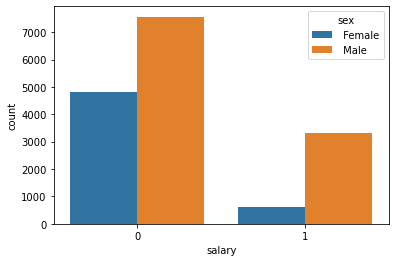

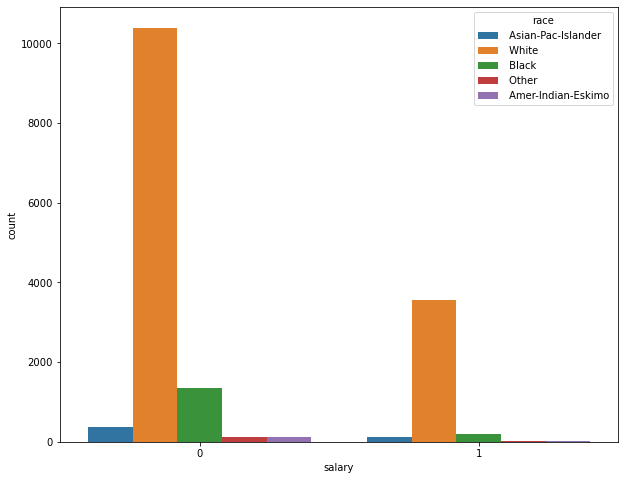

In [6]:
#import seaborn as sns
#plt.figure(figsize = (10,8))
sns.countplot(y_train['salary'], hue=X_train['sex'])
plt.savefig("bias1")
plt.show()
plt.figure(figsize = (10,8))
sns.countplot(y_train['salary'], hue=X_train['race'])
plt.savefig("bias figure")
# TODO

## Data exploration

### Question 1

In [7]:
from sklearn.impute import SimpleImputer
cols = X_train.columns

print(X_train.isnull().sum())
print("--------after cleaning-----------")

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X_train = pd.DataFrame(imp.fit_transform(X_train), columns=cols)


# TODO
X_train.isnull().sum()


age                  0
education-num      240
hours-per-week       0
workclass          936
education            0
marital-status       0
occupation        1181
relationship         0
race                 0
sex                  0
native-country     300
dtype: int64
--------after cleaning-----------


age               0
education-num     0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

# Question 2

In [8]:
# TODO
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
b = ['Outside US' if str(row) != ' United-States' else 'United-States' for row in X_train['native-country']]
X_train["native-country"] = b

b = ['Outside US' if str(row) != ' United-States' else 'United-States' for row in X_test['native-country']]
X_test["native-country"] = b

cols=["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
#X_train[cols] = lb_make.fit_transform(X_train[cols])

for i in range(3,11):
    lb_make = LabelEncoder()
    X_train.iloc[:,i] =  lb_make.fit_transform(X_train.iloc[:,i])
    X_test.iloc[:,i] =  lb_make.transform(X_test.iloc[:,i])
    

### Question 3

## Experiments

### Question 1

In [9]:
from sklearn.model_selection import train_test_split

X_training, X_val, y_training, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True, stratify=y_train)


### Question 2

In [10]:
import warnings
warnings.filterwarnings('ignore')

No handles with labels found to put in legend.


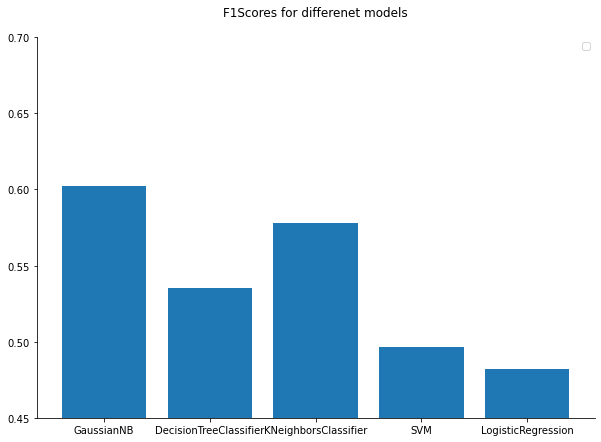

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

random_state = 42

models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "SVM": SVC(kernel="poly",C=10,random_state=42),
    "LogisticRegression": LogisticRegression(C=10,random_state=42)
}
plt.figure(figsize = (10,7))
f1_scores= []
for name, model in models.items():
     model.fit(X_training,y_training)
     prediction = model.predict(X_val)
     f1_scores.append(f1_score(y_val, prediction))

print('\n')
plt.bar(models.keys(),f1_scores)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.legend()
plt.ylim([0.45, 0.70])
plt.title('F1Scores for differenet models\n')
# plt.xlabel('False Positive Rate')
# plt.xlabel('True negaitive Rate')
plt.savefig("F1 score.jpg")

### Question 3

In [12]:
from sklearn.metrics import make_scorer
scoring_method_f1 = make_scorer(lambda prediction, true_target: f1_score(prediction, true_target, average="weighted"))

In [13]:
from sklearn.model_selection import GridSearchCV
grid_scores=[]
model_parameters = {
    "GaussianNB": {
    },
    "DecisionTreeClassifier": {
        'max_depth': [None, 2,3,4,5,6,7,8,9,10],
        'random_state' : [42],
        'min_samples_leaf': [2,3,4]
    },
    # START ANSWER
    
    "KNeighborsClassifier": {
         'n_neighbors': [1,3,5,7,9,11,1],
         'weights': ['uniform' , 'distance'],
         'p': [1,2]   
    },
    "SVM": {
        'C': [0.1,10],
        'random_state' : [42],
        'kernel' : ['poly', 'sigmoid']
    },
    "LogisticRegression": {
        'C': [0.001,1.0,4,5,10],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'random_state' : [42]
    }}
    
    
for model_name, parameters in model_parameters.items():
        model = models[model_name]
    
        grid_search = GridSearchCV(model, parameters,n_jobs=-1, verbose=False,scoring=scoring_method_f1).fit(X_training, y_training)
    
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        
        predicts=best_model.predict(X_val)
        grid_scores.append(f1_score(y_val,predicts))
        print(model_name)
        print("- best_score =", best_score)
        print("best paramters:")
        for k,v in best_params.items():
            print("-", k, v)
    # END ANSWER


GaussianNB
- best_score = 0.7825628814268187
best paramters:
DecisionTreeClassifier
- best_score = 0.8196757738572906
best paramters:
- max_depth 8
- min_samples_leaf 4
- random_state 42
KNeighborsClassifier
- best_score = 0.8021733775752289
best paramters:
- n_neighbors 9
- p 1
- weights uniform
SVM
- best_score = 0.78702271881832
best paramters:
- C 10
- kernel poly
- random_state 42
LogisticRegression
- best_score = 0.7795390594072705
best paramters:
- C 10
- penalty l2
- random_state 42


### Question 4

No handles with labels found to put in legend.


[0.6021739130434783,
 0.6366120218579234,
 0.5800524934383202,
 0.4966887417218543,
 0.48231511254019294]

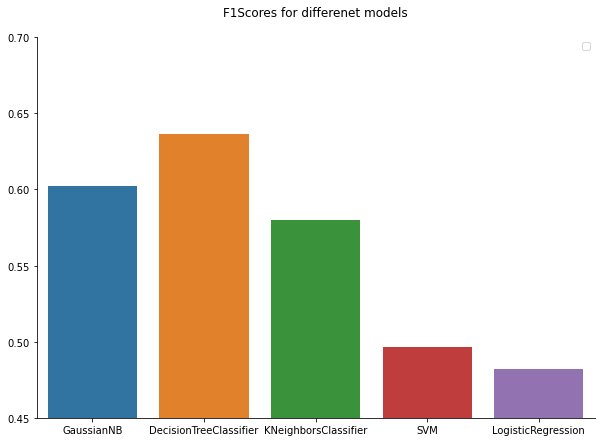

In [16]:
plt.figure(figsize = (10,7))
sns.barplot(list(models.keys()),grid_scores)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.legend()
plt.ylim([0.45, 0.70])
plt.title('F1Scores for differenet models\n')
plt.savefig("tuning.jpg")
grid_scores

### Question 5

In [19]:
#TODO
finalModel = DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, random_state=42)
finalModel.fit(X_train,y_train)
prediction = finalModel.predict(X_test)
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_census.txt", index=False, header=False)